In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import pygeos
import rtree

In [40]:
df = gpd.read_file('../raw_data/Maps/social_data_pr.shp')

In [38]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'geometry', 'MH_rate',
       'area', 'pop_dens'],
      dtype='object')

### Creating a migration rate variable

In [44]:
df['MH_rate'] = df.MH_E / df.E_E

In [45]:
df['MH_rate'].mean()

0.3498408646096005

In [46]:
df['MH_E'].sum() / df['E_E'].sum()

0.3569203165575865

### Creating a population density column

**Computing polygon areas**

In [42]:
df['area'] = df.geometry.area

**Calculating population density**

In [43]:
df['pop_dens'] = df['E_E'] / df['area']

In [52]:
df

,E_E,E_EM,E_EW,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,...,ant_transf,Kinderarmu,ant_arbe_1,ant_tran_1,Kinderar_1,BEZ,geometry,area,pop_dens,MH_rate
0,7270.352618,0.492187,0.507813,0.007894,0.057267,0.137753,0.030203,0.058145,0.446264,0.123359,...,2.33,2.58,0.77,0.08,-0.10,11,"POLYGON ((399848.954 5815619.506, 399854.727 5...",2.292755e+06,0.003171,0.150484
1,9797.460933,0.495604,0.504396,0.010169,0.058263,0.089598,0.024142,0.057224,0.600788,0.089757,...,4.95,8.13,0.68,0.28,0.36,03,"POLYGON ((393175.012 5821135.577, 393167.174 5...",4.112974e+05,0.023821,0.336065
2,2037.887335,0.470872,0.529128,0.007609,0.053591,0.083072,0.025393,0.067306,0.355233,0.131022,...,17.81,41.68,1.74,-1.03,-0.14,07,"POLYGON ((388394.110 5807792.070, 388379.276 5...",4.137654e+05,0.004925,0.398689
3,6441.757140,0.522952,0.477048,0.012072,0.058829,0.064388,0.014803,0.060079,0.680503,0.064535,...,9.85,21.15,1.15,-0.54,-2.27,02,"POLYGON ((396010.552 5819339.570, 396021.567 5...",2.488554e+05,0.025886,0.392928
4,14514.988193,0.480151,0.519849,0.009263,0.061672,0.110603,0.038139,0.079804,0.352087,0.112010,...,23.14,51.53,1.91,-3.22,-5.82,12,"POLYGON ((387367.428 5828619.763, 387315.862 5...",1.127298e+06,0.012876,0.455928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,6440.342217,0.487645,0.512355,0.004828,0.041508,0.076099,0.027935,0.074127,0.333953,0.171122,...,7.06,20.69,1.01,-0.31,0.55,12,"POLYGON ((387280.650 5828614.114, 387266.882 5...",2.493473e+06,0.002583,0.245442
538,2068.519553,0.512951,0.487049,0.005843,0.038032,0.093844,0.020962,0.041949,0.346883,0.188809,...,2.67,4.24,0.47,-1.09,-1.33,03,"POLYGON ((392586.179 5829994.574, 392586.626 5...",1.306118e+07,0.000158,0.062486
539,9137.150256,0.499446,0.500554,0.005462,0.046298,0.088626,0.025099,0.045778,0.351910,0.204367,...,1.72,2.89,0.03,0.16,0.90,10,"POLYGON ((406064.851 5815581.891, 406061.455 5...",3.688847e+06,0.002477,0.080178
540,3836.154248,0.528045,0.471955,0.006987,0.040745,0.063427,0.018065,0.061069,0.583136,0.123645,...,19.22,40.42,2.01,-1.34,0.63,08,"POLYGON ((391887.140 5816592.598, 391898.686 5...",8.659063e+05,0.004430,0.575629


### Calculating population age rates

In [41]:
bins = ['E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110']

for b in bins: 
    df[b] = df[b] / df.E_E

,E_E,E_EM,E_EW,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,...,Name,EW,ant_arbeit,ant_transf,Kinderarmu,ant_arbe_1,ant_tran_1,Kinderar_1,BEZ,geometry
0,7270.352618,0.492187,0.507813,0.007894,0.057267,0.137753,0.030203,0.058145,0.446264,0.123359,...,Karlshorst Süd,7252,1.80,2.33,2.58,0.77,0.08,-0.10,11,"POLYGON ((399848.954 5815619.506, 399854.727 5..."
1,9797.460933,0.495604,0.504396,0.010169,0.058263,0.089598,0.024142,0.057224,0.600788,0.089757,...,Immanuelkirchstraße,9164,2.73,4.95,8.13,0.68,0.28,0.36,03,"POLYGON ((393175.012 5821135.577, 393167.174 5..."
2,2037.887335,0.470872,0.529128,0.007609,0.053591,0.083072,0.025393,0.067306,0.355233,0.131022,...,Tirschenreuther Ring Ost,6429,6.72,17.81,41.68,1.74,-1.03,-0.14,07,"POLYGON ((388394.110 5807792.070, 388379.276 5..."
3,6441.757140,0.522952,0.477048,0.012072,0.058829,0.064388,0.014803,0.060079,0.680503,0.064535,...,Wismarplatz,7877,4.91,9.85,21.15,1.15,-0.54,-2.27,02,"POLYGON ((396010.552 5819339.570, 396021.567 5..."
4,14514.988193,0.480151,0.519849,0.009263,0.061672,0.110603,0.038139,0.079804,0.352087,0.112010,...,Märkisches Zentrum,14722,9.34,23.14,51.53,1.91,-3.22,-5.82,12,"POLYGON ((387367.428 5828619.763, 387315.862 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,6440.342217,0.487645,0.512355,0.004828,0.041508,0.076099,0.027935,0.074127,0.333953,0.171122,...,Wittenau Nord,6434,3.10,7.06,20.69,1.01,-0.31,0.55,12,"POLYGON ((387280.650 5828614.114, 387266.882 5..."
538,2068.519553,0.512951,0.487049,0.005843,0.038032,0.093844,0.020962,0.041949,0.346883,0.188809,...,Blankenfelde,2058,1.83,2.67,4.24,0.47,-1.09,-1.33,03,"POLYGON ((392586.179 5829994.574, 392586.626 5..."
539,9137.150256,0.499446,0.500554,0.005462,0.046298,0.088626,0.025099,0.045778,0.351910,0.204367,...,Pilgramer Straße,9578,0.63,1.72,2.89,0.03,0.16,0.90,10,"POLYGON ((406064.851 5815581.891, 406061.455 5..."
540,3836.154248,0.528045,0.471955,0.006987,0.040745,0.063427,0.018065,0.061069,0.583136,0.123645,...,Hasenheide,4516,9.15,19.22,40.42,2.01,-1.34,0.63,08,"POLYGON ((391887.140 5816592.598, 391898.686 5..."


In [47]:
bins = ['MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110']

for b in bins: 
    df[b] = df[b] / df.MH_E

<AxesSubplot:xlabel='pop_dens', ylabel='Count'>

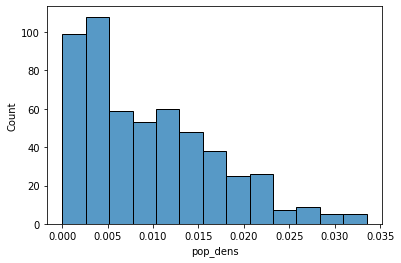

In [55]:
columns = 

sns.histplot(df['pop_dens'])

In [64]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'geometry', 'area',
       'pop_dens', 'MH_rate'],
      dtype='object')

In [66]:
columns = ['E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1','MH_rate','pop_dens']

/var/folders/sx/4s_zvfwj1xddph7py3s74ych0000gn/T/ipykernel_47155/3179242777.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


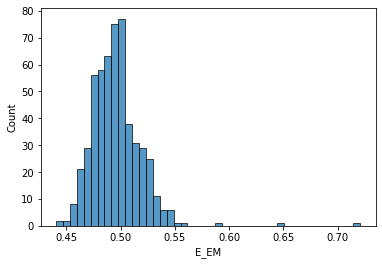

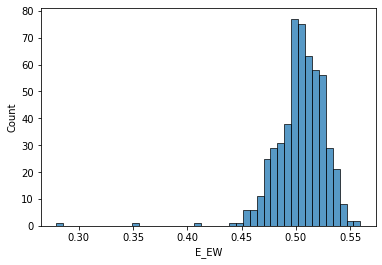

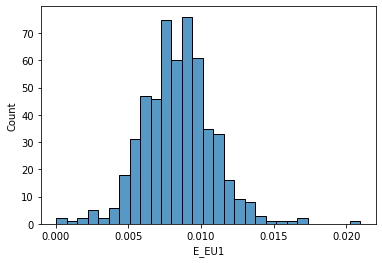

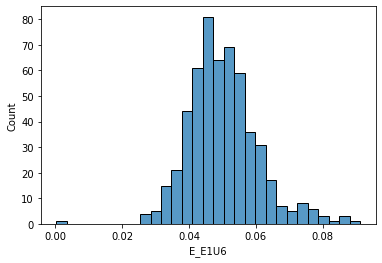

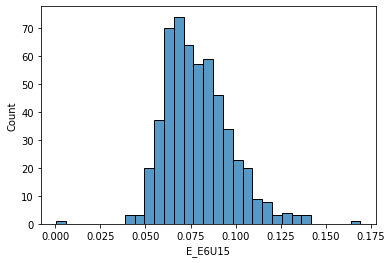

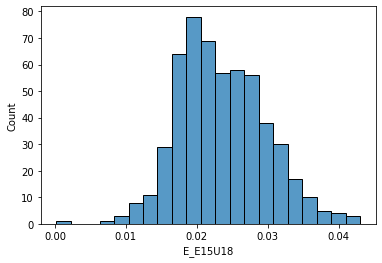

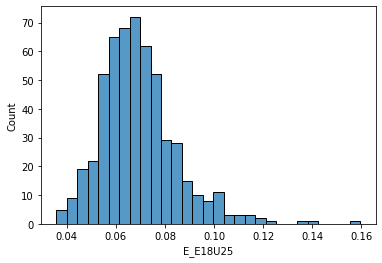

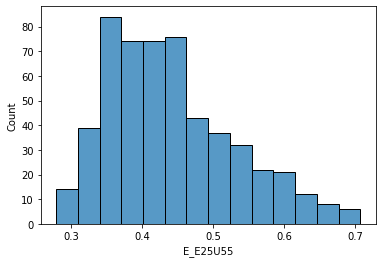

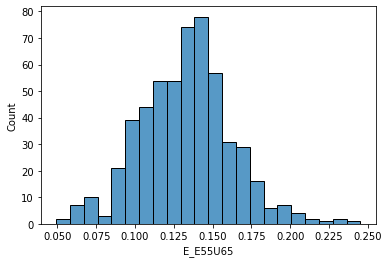

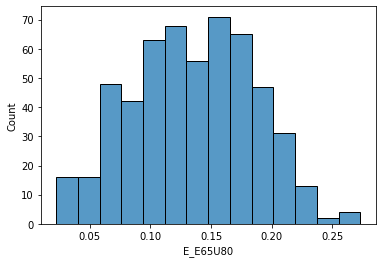

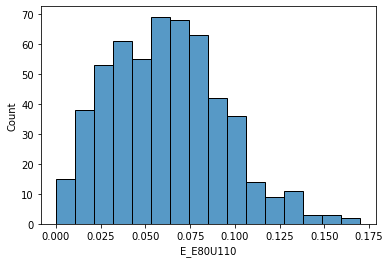

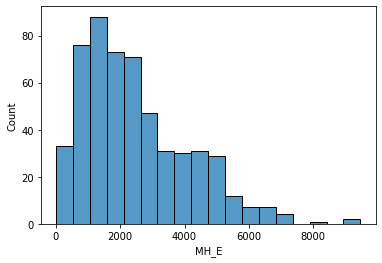

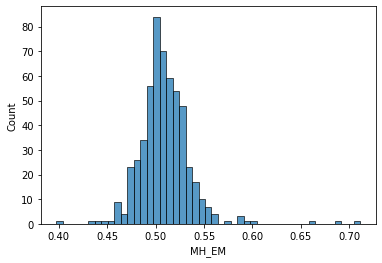

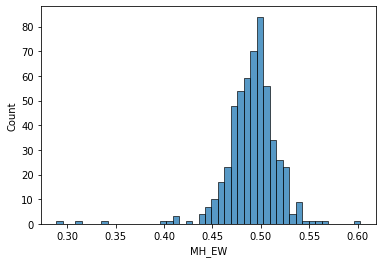

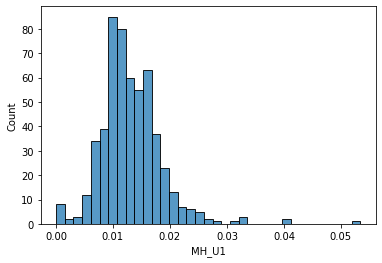

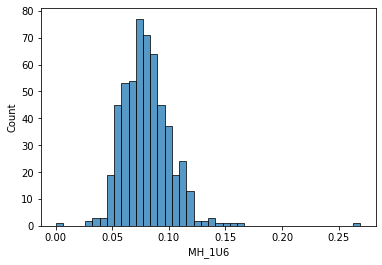

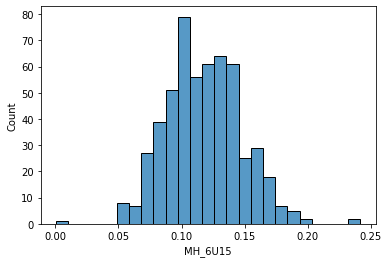

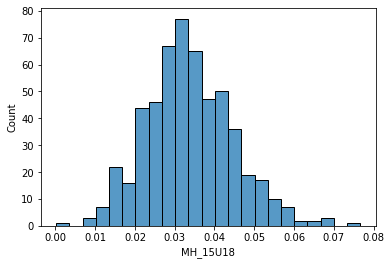

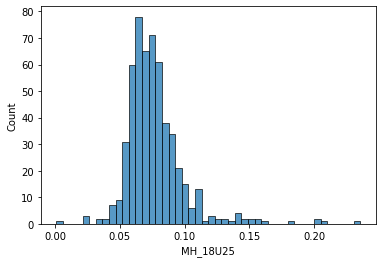

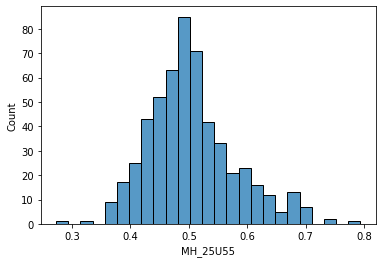

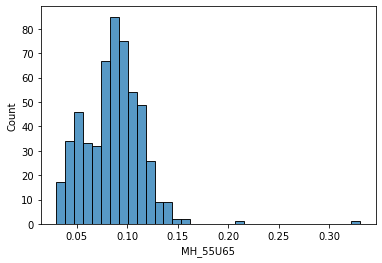

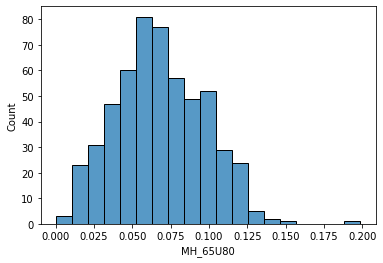

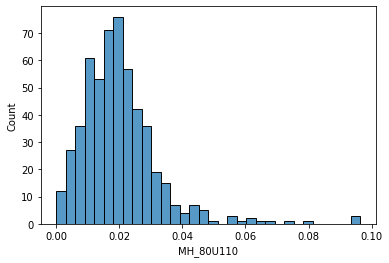

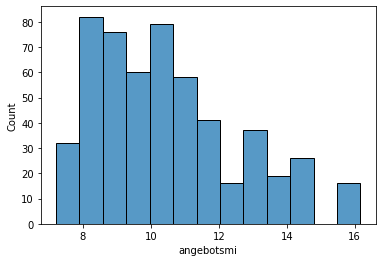

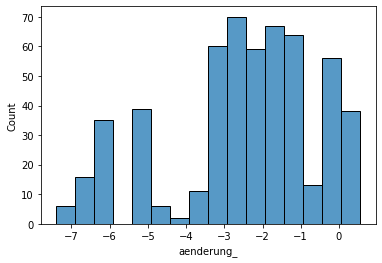

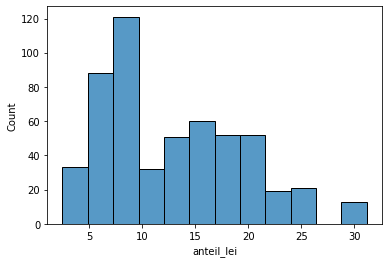

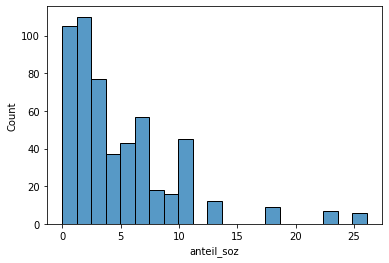

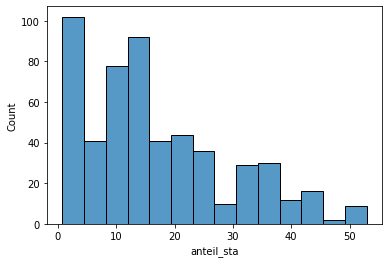

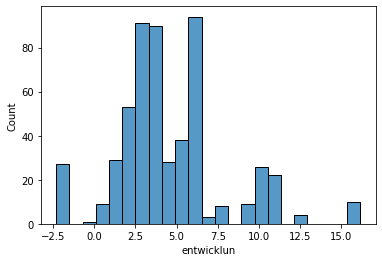

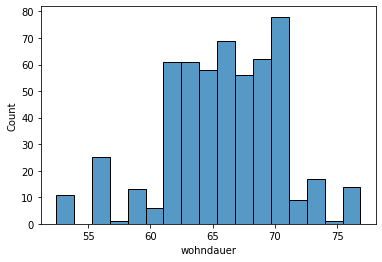

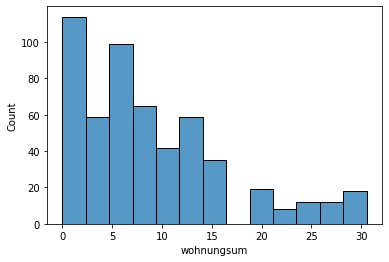

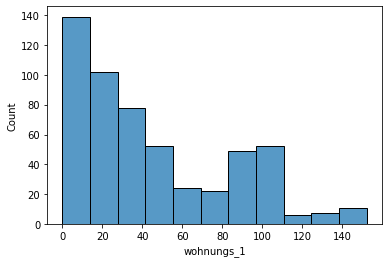

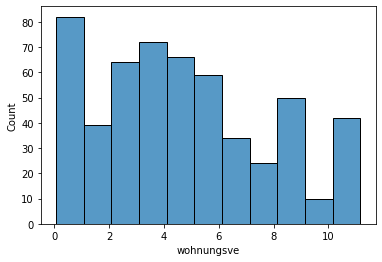

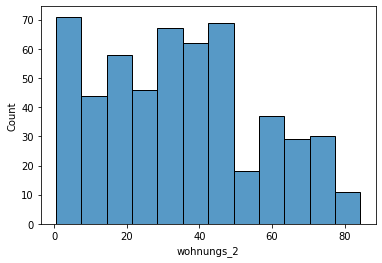

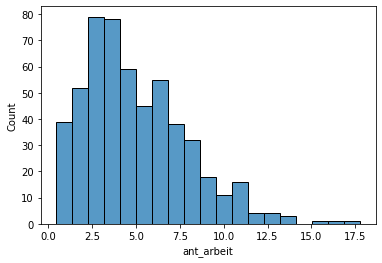

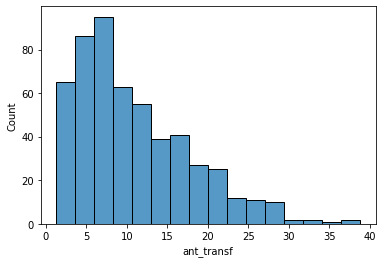

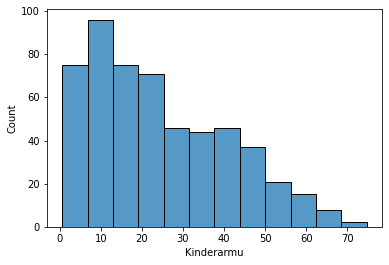

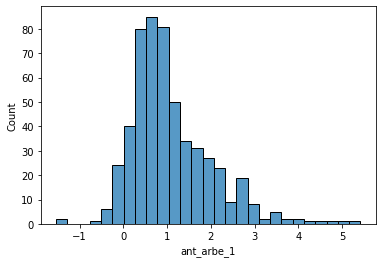

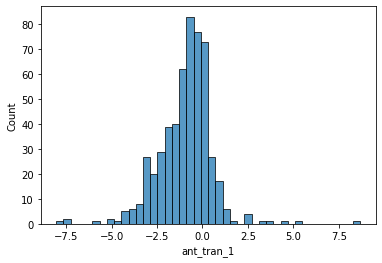

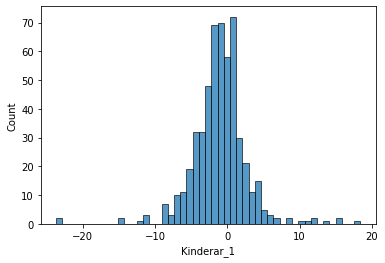

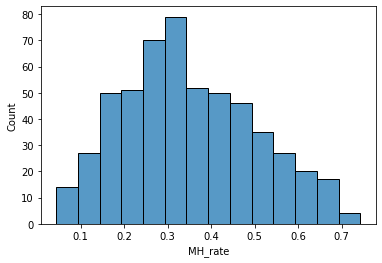

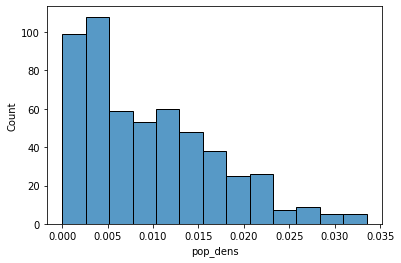

In [81]:
for c in columns:
    plt.figure()
    sns.histplot(df[c])
plt.show()


In [56]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'geometry', 'area',
       'pop_dens', 'MH_rate'],
      dtype='object')